# Household Behavior over the Life Cycle. Exam 2023.
### By Hans Christian Jul Lehmann

## Table of Contents
* [Exercise 3: Simulated Choice Variables](#first-bullet)
* [Exercise 4: Estimating the Correlation between Relative Wages and Home Production Hours](#second-bullet)
* [Exercise 7: Extending the Model](#third-bullet)
* [Exercise 8: Specialization Before and After Children](#fourth-bullet)
* [Exercise 9: Structural Estimation](#fifth-bullet)
* [Exercise 10: Model Fit](#sixth-bullet)
* [Exercise 11: Male Work Hours](#seventh-bullet)
* [Exercise 12: The Role of Human Capital Accumulation](#eight-bullet)
* [Exercise 13: Measurement Errors](#ninth-bullet)

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import optimize
import os

from DynamicSpecializationModel import DynamicSpecializationModelClass

# Exercise 3: Simulating Choice Variables <a class="anchor" id="first-bullet"></a>

In [2]:
model_baseline = DynamicSpecializationModelClass(par={'p_birth':0.0})
model_baseline.solve()
model_baseline.simulate()

**Plot**

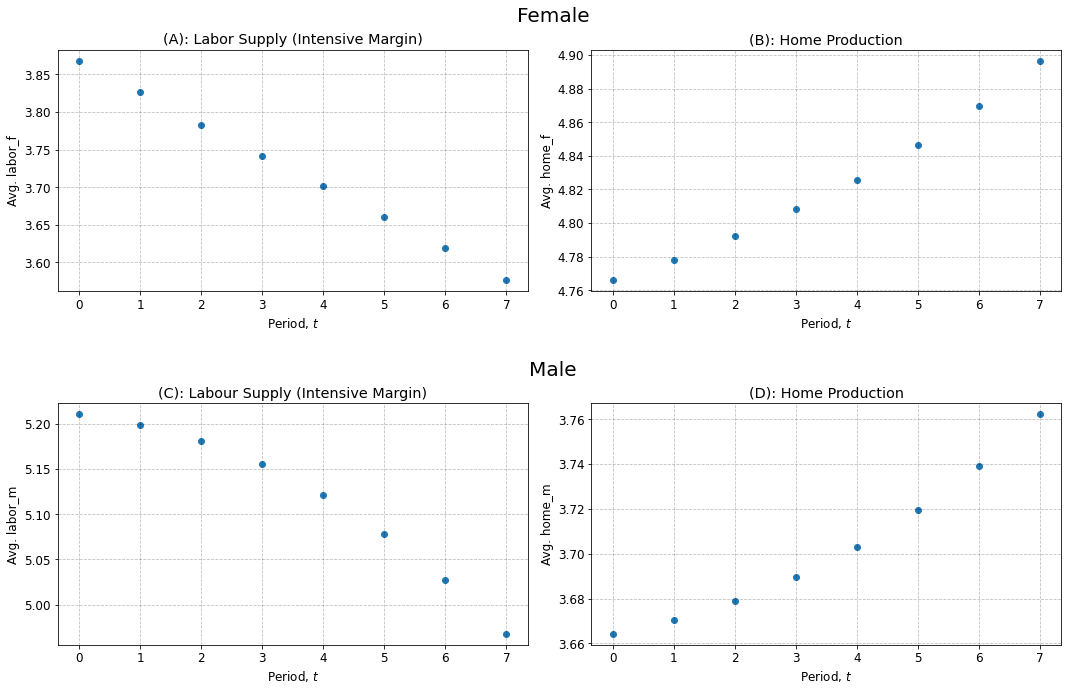

In [3]:
def get_key(idx):
    """ fetch name associated with variable """
    row_title = {0: 'Female  \n', 1: 'Male  \n'}
    return row_title[idx]

# Unpack parameters and simulation results
par = model_baseline.par
sim = model_baseline.sim

# a. initiate figure
fig, big_axes = plt.subplots( figsize=(15,10), nrows=2, ncols=1)

# Assign titles for each variable
titles = {'labor_f': 'Labor Supply (Intensive Margin)', 'home_f': 'Home Production', 'labor_m': 'Labour Supply (Intensive Margin)', 'home_m': 'Home Production'}

# Assign panel letters for each variable
panel_letters = {'labor_f': 'A', 'home_f': 'B', 'labor_m': 'C', 'home_m': 'D'}

for idx, big_ax in enumerate(big_axes):
    big_ax.axis('off')
    big_ax.set_title(get_key(idx), fontsize=20, color='black')
    title = big_ax.title

    # create subplots
    simvarlist = [('labor_f', 'A', titles['labor_f']), 
                  ('home_f', 'B', titles['home_f'])] if idx == 0 else [('labor_m', 'C', titles['labor_m']), 
                                                                       ('home_m', 'D', titles['home_m'])]

    axs = [fig.add_subplot(2, 2, i+1+2*idx) for i in range(len(simvarlist))]

    for i, (simvar,panel_letter,simvarlatex) in enumerate(simvarlist):
        simdata = getattr(sim,simvar)

        axs[i].scatter(range(par.simT), np.mean(simdata, axis=0))
        axs[i].set(xlabel='Period, $t$', ylabel=f'Avg. {simvar}', xticks=range(par.simT))
        axs[i].set_title(f'({panel_letter}): {simvarlatex}')

plt.tight_layout()

if not os.path.exists("../plots"):
    os.makedirs("../plots")

plt.savefig("../plots/LifeCycleChoiceVariables.pdf", bbox_inches='tight')
plt.show()

**Further Exploration**

In [4]:
np.mean(sim.wage_f,axis=0)

array([1.16587557, 1.16656597, 1.16702201, 1.16725501, 1.16728938,
       1.16714591, 1.16683377, 1.16636281])

In [5]:
np.mean(sim.wage_m,axis=0)

array([1.16536419, 1.1726174 , 1.1791706 , 1.18504731, 1.19026264,
       1.19482729, 1.19875683, 1.20206459])

In [6]:
np.mean(sim.kf,axis=0)

array([1.49760634, 1.50902174, 1.51753375, 1.52340122, 1.52696495,
       1.5285087 , 1.52819287, 1.52617557])

In [7]:
np.mean(sim.km,axis=0)

array([1.49313069, 1.56091681, 1.62144561, 1.67518106, 1.72247497,
       1.76360311, 1.79884901, 1.82844831])

# Exercise 4: Estimating the Correlation between Relative Wages and Home Production Hours <a class="anchor" id="second-bullet"></a>

Run the regression to get intercept and slope coefficient:

In [8]:
model_baseline.regress()

(0.2586951136696054, -0.3219270133150871)

Plot estimated relationship:

<AxesSubplot:xlabel='$log(w_f/w_m)$', ylabel='$log(h_f/h_m)$'>

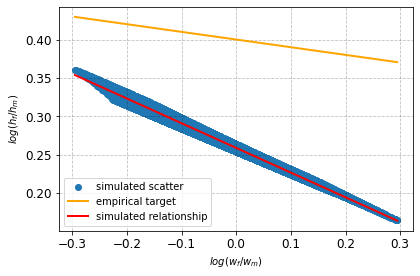

In [9]:
model_baseline.plot()

# Exercise 7: Extending the Model <a class="anchor" id="third-bullet"></a>

Instantiate model with a probability of child arrival next period being 0.1:

In [10]:
model = DynamicSpecializationModelClass()
model.solve()
model.simulate()

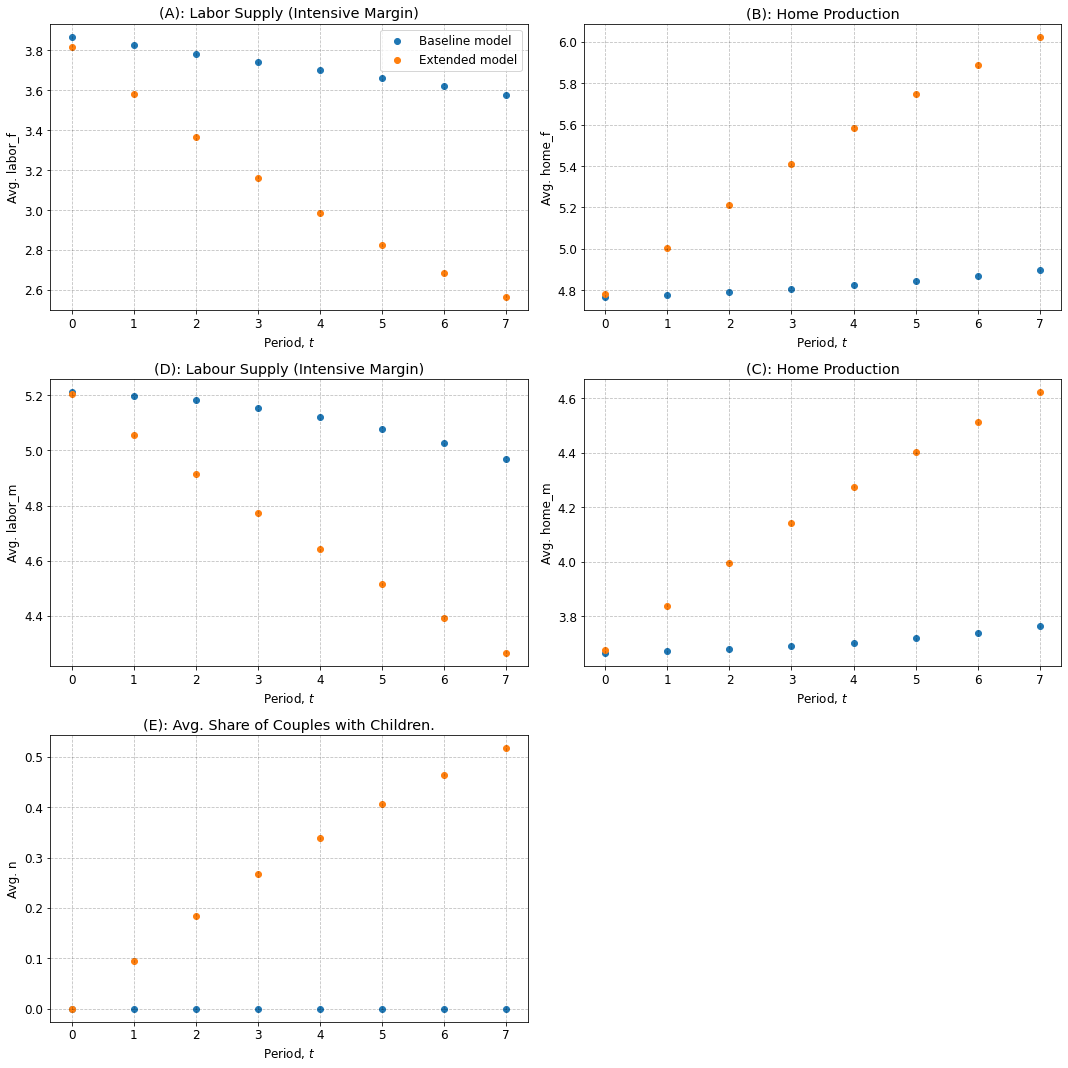

In [11]:
# Initialize a dictionary to store the axes for each plot
ax = {}

# Set up a 3x2 grid of subplots 
fig, ((ax['labor_f'], ax['home_f']), (ax['labor_m'], ax['home_m']), (ax['n'], _)) = plt.subplots(3, 2, figsize=(15,15))

# Assign titles for each variable
titles = {'labor_f': 'Labor Supply (Intensive Margin)', 'home_f': 'Home Production', 
          'labor_m': 'Labour Supply (Intensive Margin)', 'home_m': 'Home Production', 'n': 'Avg. Share of Couples with Children.'}

# Assign panel letters for each variable
panel_letters = {'labor_f': 'A', 'home_f': 'B', 'home_m': 'C', 'labor_m': 'D', 'n': 'E'}

# Iterate over the keys of the dictionary, which correspond to the variables of interest
for var in ('labor_f', 'home_f', 'home_m', 'labor_m', 'n'):
    # Calculate the mean of the variable of interest
    mean_values = np.mean(getattr(model_baseline.sim, var), axis=0)
    mean_values_extension = np.mean(getattr(model.sim, var), axis=0)
    
    # Plot the mean values
    ax[var].scatter(range(par.simT), mean_values,  label='Baseline model')
    ax[var].scatter(range(par.simT), mean_values_extension,  label='Extended model')

    # Set up the labels and ticks of the x-axis and y-axis
    ax[var].set(xlabel='Period, $t$', ylabel=f'Avg. {var}', xticks=range(par.simT))

    # Set the title for the subplot with the corresponding panel letter
    ax[var].set_title(f'({panel_letters[var]}): {titles[var]}')
    
    # Add legend to the first subplot
    if var == 'labor_f':
        ax[var].legend()

# Remove the unused subplot
fig.delaxes(_)

# Ensure a clean layout
fig.tight_layout()

if not os.path.exists("../plots"):
    os.makedirs("../plots")

plt.savefig("../plots/ExtensionChoiceVariables.pdf", bbox_inches='tight')
plt.show()

# Exercise 8: Specialization Before and After Children <a class="anchor" id="fourth-bullet"></a>

In [12]:
# import local file
from DynamicSpecializationModel import specilization_graph

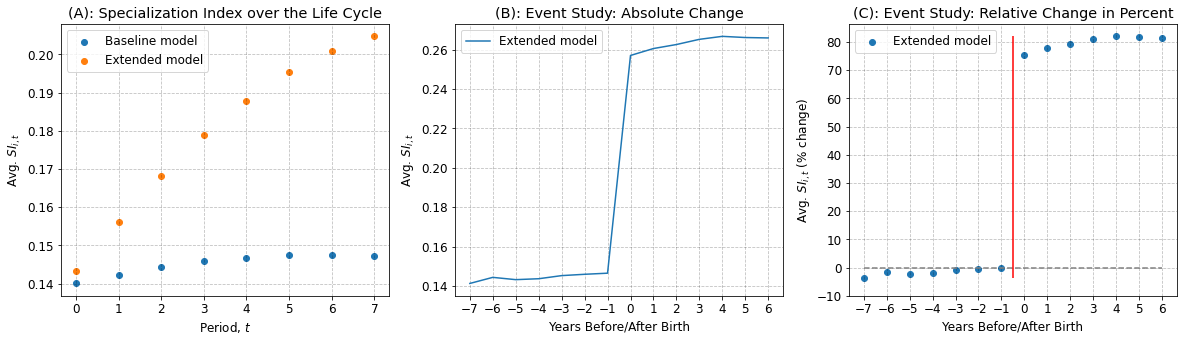

In [13]:
# create the subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# plot the Hours graph (Subplot 1)
axs[0].scatter(range(model_baseline.par.T), np.mean(getattr(model_baseline.sim, 'specialization'), axis=0), label='Baseline model')
axs[0].scatter(range(model.par.T), np.mean(getattr(model.sim, 'specialization'), axis=0), label='Extended model')
axs[0].legend(frameon=True)
axs[0].set(xlabel='Period, $t$', ylabel='Avg. $S I_{i, t}$')
axs[0].set_title('(A): Specialization Index over the Life Cycle')
axs[0].grid(True)  # Added grid lines for the first subplot

# Specialization - Event Study Graph (Subplot 2)
specilization_graph(model,relative_change=False, ax=axs[1])
axs[1].set(xlabel='Years Before/After Birth', ylabel='Avg. $S I_{i, t}$')
axs[1].set_title('(B): Event Study: Absolute Change')
axs[1].grid(True)  # Added grid lines for the second subplot
axs[1].set_xticks(np.arange(-7, 7, step=1))  # Set x-ticks for each year

# Specialization - Event Study Graph (Subplot 3)
specilization_graph(model,relative_change=True, ax=axs[2])
axs[2].set(xlabel='Years Before/After Birth', ylabel='Avg. $S I_{i, t}$ (% change)')
axs[2].set_title('(C): Event Study: Relative Change in Percent')
axs[2].grid(True)  # Added grid lines for the second subplot
axs[2].set_xticks(np.arange(-7, 7, step=1))  # Set x-ticks for each year
axs[2].set_yticks(np.arange(-10, 90, step=10)) 

# adjust spacing between subplots and save the figure
plt.subplots_adjust(wspace=0.2)

# Create plots directory if not exists
if not os.path.exists("../plots"):
        os.makedirs("../plots")

# Save the figure
plt.savefig("../plots/Specialization.pdf", bbox_inches='tight')

# Show the figure
plt.show()

Compute correct percent hike:

In [14]:
(np.mean(model.sim.specialization[model.sim.time_since_birth==0])/np.mean(model.sim.specialization[model.sim.time_since_birth==-1])-1)

0.7548844897872722

# Exercise 9: Structural Estimation <a class="anchor" id="fifth-bullet"></a>

In [15]:
theta_names =('alpha','sigma','omega_child')

In [16]:
def obj_func(theta,theta_names,model,do_print=False):
    
    # printing
    if do_print: 
        print_str = ''
        for i,name in enumerate(theta_names):
            print_str += f'{name}={theta[i]:2.8f} '
        print(print_str)
            
    # calculate moments from simulation
    mom_sim = simulate_moments(theta,theta_names,model,do_print=False)
    
    # set target moments 
    target_moments = np.array([0.4,-0.1,1.0])
    
    # equal weighting
    obj = np.sum((target_moments - mom_sim)**2)
    
    # return objective and moments for plotting
    return obj

In [17]:
def simulate_moments(theta,theta_names,model,do_print=False):
        
    # update parameters
    for i,name in enumerate(theta_names):
        setattr(model.par,name,theta[i])
    
    # solve and simulate model with these parameters
    model.solve()
    model.simulate()
    model.regress()
    
    # return moments from simulated data
    return moment_func(model.sim)

In [18]:
def moment_func(input_data):  
    return np.array([input_data.constant,input_data.slope,(np.mean(input_data.specialization[input_data.time_since_birth==0]) / (np.mean(input_data.specialization[input_data.time_since_birth==-1]))-1)])

In [19]:
# Define tolerance
tolerance = 1e-8

# call numerical optimizer
objective = lambda theta: obj_func(theta,theta_names,model,do_print=True)

theta_init = np.array([0.98,0.1,-0.25])  # initialize as per assignment text

res = minimize(objective,theta_init,method='nelder-mead', options={'xatol': tolerance})
res

alpha=0.98000000 sigma=0.10000000 omega_child=-0.25000000 
alpha=1.02900000 sigma=0.10000000 omega_child=-0.25000000 
alpha=0.98000000 sigma=0.10500000 omega_child=-0.25000000 
alpha=0.98000000 sigma=0.10000000 omega_child=-0.26250000 
alpha=0.93100000 sigma=0.10333333 omega_child=-0.25833333 
alpha=1.00450000 sigma=0.10083333 omega_child=-0.25208333 
alpha=0.98000000 sigma=0.10250000 omega_child=-0.25000000 
alpha=0.98000000 sigma=0.10250000 omega_child=-0.25625000 
alpha=1.00450000 sigma=0.10250000 omega_child=-0.25000000 
alpha=0.95550000 sigma=0.10416667 omega_child=-0.25416667 
alpha=0.99225000 sigma=0.10291667 omega_child=-0.25104167 
alpha=0.98000000 sigma=0.10375000 omega_child=-0.25000000 
alpha=0.98000000 sigma=0.10375000 omega_child=-0.25312500 
alpha=0.99225000 sigma=0.10375000 omega_child=-0.25000000 
alpha=0.96775000 sigma=0.10458333 omega_child=-0.25208333 
alpha=0.97387500 sigma=0.10437500 omega_child=-0.25156250 
alpha=0.98612500 sigma=0.10395833 omega_child=-0.2505208

 final_simplex: (array([[ 0.97850413,  0.10417467, -0.24682659],
       [ 0.97850413,  0.10417467, -0.24682659],
       [ 0.97850413,  0.10417466, -0.2468266 ],
       [ 0.97850413,  0.10417467, -0.2468266 ]]), array([1.52791674e-05, 1.61353195e-05, 1.62458327e-05, 1.62995029e-05]))
           fun: 1.5279167387829516e-05
       message: 'Optimization terminated successfully.'
          nfev: 161
           nit: 68
        status: 0
       success: True
             x: array([ 0.97850413,  0.10417467, -0.24682659])

Calculate the (estimated) AAH:

In [20]:
estimated_alpha = res.x[0]
AAH = estimated_alpha / (1 - estimated_alpha)
print(f"AAH is {AAH}")

AAH is 45.52056824161982


In [37]:
model = DynamicSpecializationModelClass(par={'alpha':0.97850413,'sigma':0.10417467,'omega_child':-0.24682659})
model.solve()
model.simulate()

Check simulated moments:

In [22]:
model.sim.constant

0.4003319247532097

In [23]:
model.sim.slope

-0.10396186851148023

In [24]:
(np.mean(model.sim.specialization[model.sim.time_since_birth==0])/np.mean(model.sim.specialization[model.sim.time_since_birth==-1])-1)

1.0008639223894318

# Exercise 10: Model Fit <a class="anchor" id="sixth-bullet"></a>

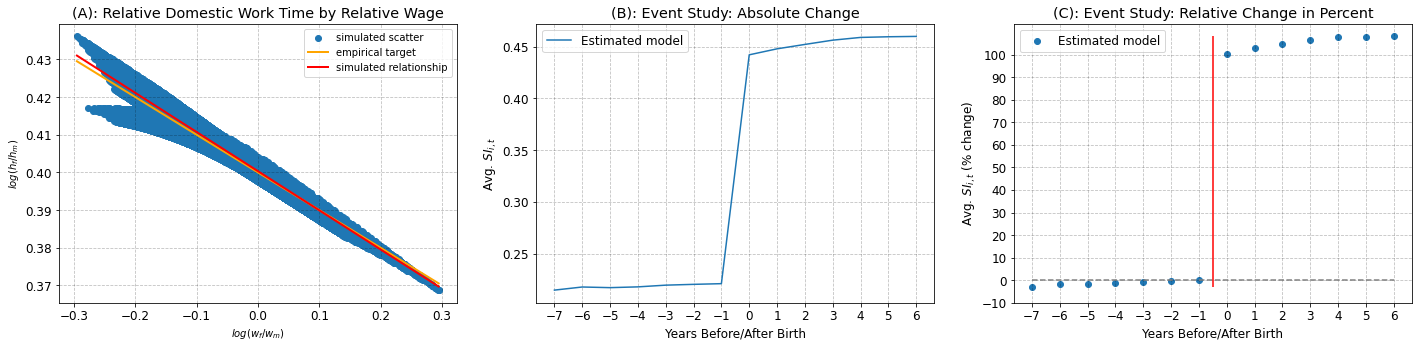

In [25]:
# create the subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].set_title('(A): Relative Domestic Work Time by Relative Wage')
model.plot(ax=axs[0])

# Specialization - Event Study Graph (Subplot 2)
specilization_graph(model,relative_change=False, ax=axs[1])
axs[1].set(xlabel='Years Before/After Birth', ylabel='Avg. $S I_{i, t}$')
axs[1].set_title('(B): Event Study: Absolute Change')
axs[1].grid(True)  # Added grid lines for the second subplot
axs[1].set_xticks(np.arange(-7, 7, step=1))  # Set x-ticks for each year
axs[1].legend(['Estimated model'])

# Specialization - Event Study Graph (Subplot 2)
specilization_graph(model,relative_change=True, ax=axs[2])
axs[2].set(xlabel='Years Before/After Birth', ylabel='Avg. $S I_{i, t}$ (% change)')
axs[2].set_title('(C): Event Study: Relative Change in Percent')
axs[2].grid(True)  # Added grid lines for the second subplot
axs[2].set_xticks(np.arange(-7, 7, step=1))  # Set x-ticks for each year
axs[2].set_yticks(np.arange(-10, 110, step=10)) 
axs[2].legend(['Estimated model'])

# adjust spacing between subplots and save the figure
plt.subplots_adjust(wspace=0.2)

# Create plots directory if not exists
if not os.path.exists("../plots"):
        os.makedirs("../plots")

# Save the figure
plt.savefig("../plots/Modelfit.pdf", bbox_inches='tight')

# Show the figure
plt.show()

# Exercise 11: Male Work Hours <a class="anchor" id="seventh-bullet"></a>

In [26]:
# Event Study
def male_work_graph(model, ax=None):
    
    # a. unpack parameters
    par, sim = model.par, model.sim

    # b. time since birth
    birth = np.zeros(sim.n.shape, dtype=np.int_)
    birth[:,1:] = (sim.n[:,1:] - sim.n[:,:-1]) > 0
    periods = np.tile([t for t in range(par.simT)], (par.simN, 1)) 
    time_of_birth = np.max(periods * birth, axis=1)
    I = time_of_birth > 0 

    # Set time of birth to -1000 for those who are never considered as a child, 
    # ensuring they don't affect later calculations
    time_of_birth[~I] = -1000
    time_of_birth = np.transpose(np.tile(time_of_birth, (par.simT, 1)))
    time_since_birth = periods - time_of_birth

    # c. calculate average outcome across time since birth
    min_time = -7
    max_time = 6
    event_grid = np.arange(min_time, max_time+1)

    # calculate the average specialization index for each time period in event grid
    event_labor_m = np.array([np.mean(sim.labor_m[time_since_birth == time]) for time in event_grid])

    # d. calculate the relative change in specialization from the period before birth
    event_labor_m_rel = (event_labor_m / event_labor_m[event_grid == -1] - 1) * 100

    # e. calculate plot axis
    if ax is None:
        _, ax = plt.subplots()  # create a new plot axis

    ax.scatter(event_grid, event_labor_m_rel, label = 'Estimated model')
    ax.hlines(y=0, xmin=event_grid[0], xmax=event_grid[-1], color='gray', linestyle='--')
    ax.vlines(x=-0.5, ymin=np.nanmin(event_labor_m_rel), ymax=np.nanmax(event_labor_m_rel), color='red')

    ax.legend()

    return ax

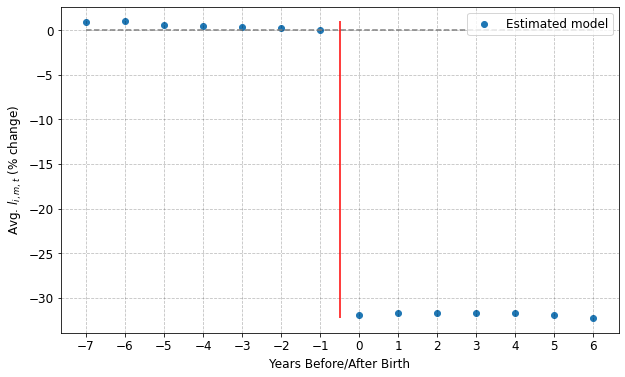

In [27]:
# create the subplot
fig, axs = plt.subplots(1, 1,figsize=(10,6))

# Male work - Event Study Graph
male_work_graph(model, ax=axs)
axs.set(xlabel='Years Before/After Birth', ylabel='Avg. $l_{i, m, t}}$ (% change)')
axs.grid(True)  # Added grid lines for the subplot
axs.set_xticks(np.arange(-7, 7, step=1))  # Set x-ticks for each year
axs.legend(['Estimated model'])

# adjust spacing between subplots and save the figure
plt.subplots_adjust(wspace=0.2)

# Create plots directory if not exists
if not os.path.exists("../plots"):
    os.makedirs("../plots")

# Save the figure
plt.savefig("../plots/MaleWorkEventStudy.pdf", bbox_inches='tight')

# Show the figure
plt.show()

Compute value of drop in male's work hours:

In [38]:
(np.mean(model.sim.labor_m[model.sim.time_since_birth==0])/np.mean(model.sim.labor_m[model.sim.time_since_birth==-1])-1)

-0.31888854911940234

# Exercise 12: The Role of Human Capital Accumulation  <a class="anchor" id="eight-bullet"></a>

In [28]:
gamma_vec = np.linspace(0.1, 1.0, num=5)

# allocate list to store computed beta values
beta_values = [] 

for gamma in gamma_vec:
    # update par
    model.par.wage_humcap_m = gamma
    model.par.wage_humcap_f = gamma

    # Solve, simulate and run regerss
    model.solve()
    model.simulate()
    model.regress()

    # Compute beta_1 for this gamma
    beta_1 = model.sim.slope

    # Store beta_1
    beta_values.append(beta_1)

In [29]:
beta_values

[-0.10396186851148023,
 -0.09485851391170207,
 -0.0731819564754897,
 -0.05778796054005786,
 -0.04779557267129049]

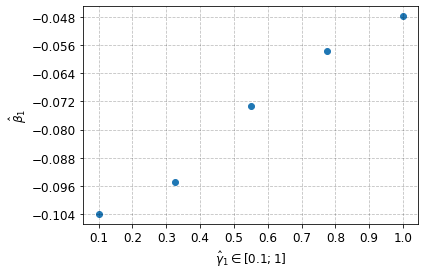

In [30]:
import matplotlib.ticker as ticker

# Plot the results
plt.scatter(gamma_vec, beta_values)

plt.xticks(np.arange(0.1, 1.1, step=0.1))  

plt.xlabel(r"$\hat\gamma_1 \in [0.1;1]$") 
plt.ylabel(r"$\hat{\beta}_1$") 

ax = plt.gca()  # get the current axes
ax.yaxis.set_major_locator(ticker.MaxNLocator(10))  

plt.grid(True)

# Create plots directory if not exists
if not os.path.exists("../plots"):
    os.makedirs("../plots")

# Save the figure
plt.savefig("../plots/HumanCapital.pdf", bbox_inches='tight')

plt.show()

# Exercise 13: Measurement Errors  <a class="anchor" id="ninth-bullet"></a>

In [31]:
model = DynamicSpecializationModelClass(par={'alpha':0.97850413,'sigma':0.10417467,'omega_child':-0.24682659})
model.solve()
model.simulate()

In [32]:
# Define the range of sigma_w values
sigma_w_values = np.linspace(0, 0.25, 5) # sigma_w > 0.25 produces NaN values

# Placeholder for the estimated betas
beta_1_hat_values = []
    
for sigma_w in sigma_w_values:
    model.par.sigma_w = sigma_w
    model.simulate()
    model.regress()
    beta_1_hat = model.sim.slope

    # Append the estimated beta to the list
    beta_1_hat_values.append(beta_1_hat)

In [33]:
beta_1_hat_values

[-0.10396186851148023,
 -0.06617439204691883,
 -0.03139630504759894,
 -0.01624022442891137,
 -0.00947980924085471]

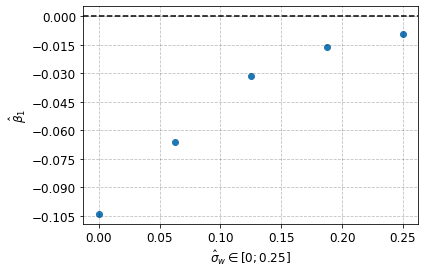

In [34]:
# Plot the results
plt.scatter(sigma_w_values, beta_1_hat_values)

plt.xticks(np.arange(0, 0.3, step=0.05))  

plt.xlabel(r"$\hat\sigma_w \in [0;0.25]$") 
plt.ylabel(r"$\hat{\beta}_1$") 

ax = plt.gca()  # get the current axes
ax.yaxis.set_major_locator(ticker.MaxNLocator(10))  

# Draw horizontal line at y=0
plt.axhline(0, color='black', linestyle='--')

plt.grid(True)

# Create plots directory if not exists
if not os.path.exists("../plots"):
    os.makedirs("../plots")

# Save the figure
plt.savefig("../plots/Measurementerror.pdf", bbox_inches='tight')

plt.show()